In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import numpy as np
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
warnings.simplefilter(action='ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [2]:
train_data= pl.read_csv("/kaggle/input/spaceship-titanic/train.csv")

print(train_data.shape)
test_data= pl.read_csv("/kaggle/input/spaceship-titanic/test.csv")
print(test_data.shape)


(8693, 14)
(4277, 13)


In [3]:
train_data.null_count()#결측치 확인

PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,201,217,199,182,179,203,181,183,208,183,188,200,0


In [4]:
train_data.describe()

describe,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
str,str,str,f64,str,str,f64,f64,f64,f64,f64,f64,f64,str,f64
"""count""","""8693""","""8693""",8693.0,"""8693""","""8693""",8693.0,8693.0,8693.0,8693.0,8693.0,8693.0,8693.0,"""8693""",8693.0
"""null_count""","""0""","""201""",217.0,"""199""","""182""",179.0,203.0,181.0,183.0,208.0,183.0,188.0,"""200""",0.0
"""mean""",null,null,0.358306,null,null,28.82793,0.023439,224.687617,458.077203,173.729169,311.138778,304.854791,null,0.503624
"""std""",null,null,0.479531,null,null,14.489021,0.151303,666.717663,1611.48924,604.696458,1136.705535,1145.717189,null,0.500016
"""min""","""0001_01""","""Earth""",0.0,"""A/0/P""","""55 Cancri e""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,"""Aard Curle""",0.0
"""25%""",null,null,null,null,null,19.0,null,0.0,0.0,0.0,0.0,0.0,null,null
"""50%""",null,null,null,null,null,27.0,null,0.0,0.0,0.0,0.0,0.0,null,null
"""75%""",null,null,null,null,null,38.0,null,47.0,76.0,27.0,59.0,46.0,null,null
"""max""","""9280_02""","""Mars""",1.0,"""T/3/P""","""TRAPPIST-1e""",79.0,1.0,14327.0,29813.0,23492.0,22408.0,24133.0,"""Zubeneb Pashar…",1.0


In [5]:
train_data.describe()

describe,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
str,str,str,f64,str,str,f64,f64,f64,f64,f64,f64,f64,str,f64
"""count""","""8693""","""8693""",8693.0,"""8693""","""8693""",8693.0,8693.0,8693.0,8693.0,8693.0,8693.0,8693.0,"""8693""",8693.0
"""null_count""","""0""","""201""",217.0,"""199""","""182""",179.0,203.0,181.0,183.0,208.0,183.0,188.0,"""200""",0.0
"""mean""",null,null,0.358306,null,null,28.82793,0.023439,224.687617,458.077203,173.729169,311.138778,304.854791,null,0.503624
"""std""",null,null,0.479531,null,null,14.489021,0.151303,666.717663,1611.48924,604.696458,1136.705535,1145.717189,null,0.500016
"""min""","""0001_01""","""Earth""",0.0,"""A/0/P""","""55 Cancri e""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,"""Aard Curle""",0.0
"""25%""",null,null,null,null,null,19.0,null,0.0,0.0,0.0,0.0,0.0,null,null
"""50%""",null,null,null,null,null,27.0,null,0.0,0.0,0.0,0.0,0.0,null,null
"""75%""",null,null,null,null,null,38.0,null,47.0,76.0,27.0,59.0,46.0,null,null
"""max""","""9280_02""","""Mars""",1.0,"""T/3/P""","""TRAPPIST-1e""",79.0,1.0,14327.0,29813.0,23492.0,22408.0,24133.0,"""Zubeneb Pashar…",1.0


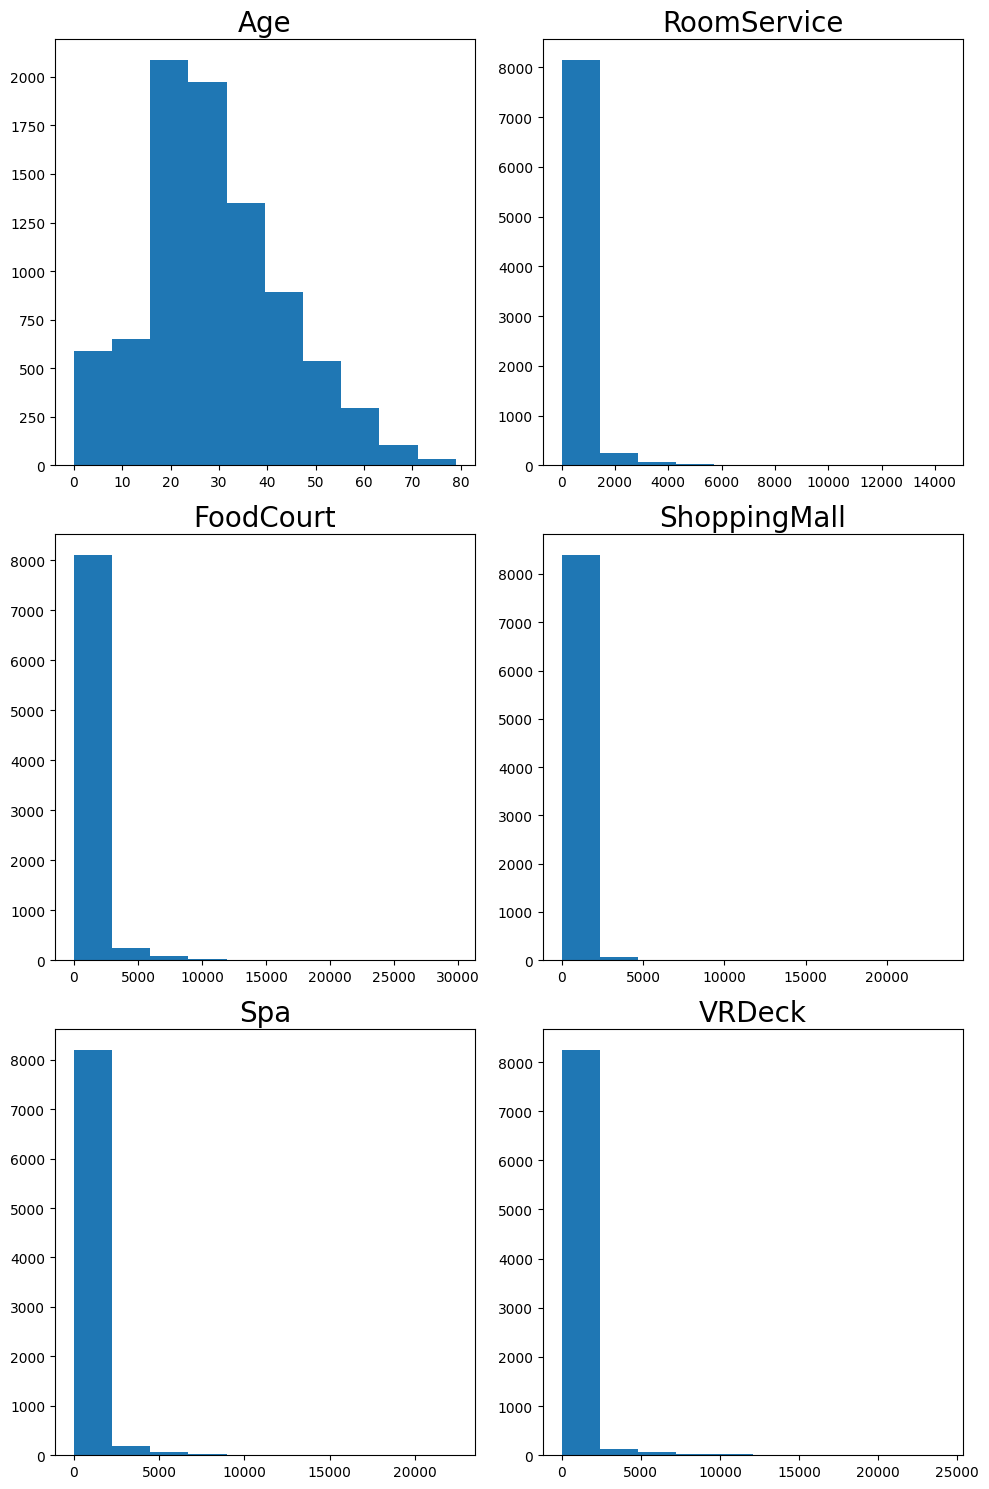

In [6]:



import matplotlib.pyplot as plt

# 예시를 위해 train_data DataFrame에서 두 개의 열('Age'와 'Salary')을 선택합니다.
columns_to_plot = ["Age", "RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"]

# 2x3 그리드의 subplot 생성
fig, axs = plt.subplots(3, 2, figsize=(10, 15))

# 각 subplot에 열에 대한 히스토그램 그리기
for i, column in enumerate(columns_to_plot):
    row = i // 2
    col = i % 2
    axs[row, col].hist(train_data[column].to_numpy(), bins=10)  # 선택한 열 데이터를 넘파이 배열로 변환하여 히스토그램 그리기
    axs[row, col].set_title(column, fontsize=20)  # 제목 설정 및 글자 크기 변경

plt.tight_layout()  # subplot 간 간격 조정
plt.show()